# 効率的フロンティアの描画

In [1]:
%matplotlib inline
#%% NumPyの読み込み
import numpy as np
#   NumPyのLinalgモジュールの読み込み
import numpy.linalg as lin
#   CVXPYの読み込み
import cvxpy as cvx
#   Pandasの読み込み
import pandas as pd
#   MatplotlibのPyplotモジュールの読み込み
import matplotlib.pyplot as plt
#   日本語フォントの設定
from matplotlib.font_manager import FontProperties
import sys
if sys.platform.startswith('win'):
    FontPath = 'C:\\Windows\\Fonts\\meiryo.ttc'
elif sys.platform.startswith('darwin'):
    FontPath = '/System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc'
elif sys.platform.startswith('linux'):
    FontPath = '/usr/share/fonts/truetype/takao-gothic/TakaoPGothic.ttf'
else:
    print('このPythonコードが対応していないOSを使用しています．')
    sys.exit()
jpfont = FontProperties(fname=FontPath)
import math
import japanize_matplotlib

In [2]:
cd /Users/shintaro/Downloads

/Users/shintaro/Downloads


In [3]:
#data1 = pd.read_csv("/Users/shintaro/Downloads/第2スクリーニング_検証.csv", encoding = 'Shift_Jis')
#data2 = pd.read_csv('3rdscreening_Data(ver1.2).csv', encoding = 'Shift_Jis')

In [4]:
#l_comp1 = data1.columns.tolist()
#l_comp2 = data2['企業名'].tolist()

In [5]:
#len_comp1 = len(l_comp1)
#len_comp2 = len(l_comp2)

In [6]:
"""
for i in range(len_comp1):
    if not(l_comp1[-(i + 1)] in l_comp2):
        del data1[l_comp1[-(i + 1)]]
""" 

'\nfor i in range(len_comp1):\n    if not(l_comp1[-(i + 1)] in l_comp2):\n        del data1[l_comp1[-(i + 1)]]\n'

In [7]:
#del data1['西日本フィナンシャルホールディングス']
#del data1['関西電力']
#del data1['静岡銀行']
#del data1['キヤノン']

In [8]:
#marketcap = data1

In [9]:
#comp_list = marketcap.columns.tolist()
#comp_list.insert(0, '日経平均')
#comp_list.insert(1, 'TOPIX')
#comp_list

In [10]:
marketcap = pd.read_csv('efficient_frontier(ver1.7).csv', encoding = 'Shift_Jis')#, encoding = 'Shift_jis')
del marketcap['TOPIX']
del marketcap['キヤノン']
del marketcap['銘柄名称']
del marketcap['日経平均']
#del marketcap['Date']
#del marketcap['エーザイ']

In [11]:
marketcap.drop(index=[61, 62, 63], inplace=True)

In [12]:
marketcap

エーザイ  ファンケル  デンソー  三菱総合研究所  日本郵船  大日本印刷   京セラ  ＫＤＤＩ  ローソン   東洋紡  コニカミノルタ  \
0    6044   1721  4046     3180  1840   1154  4891  3145  7910  1950      836   
1    6030   1633  4272     3125  1880   1052  4916  3036  7260  1640      932   
2    6287   1717  4000     3170  1880    986  4823  3115  7970  1690      850   
3    6698   1587  4565     3335  2150   1054  5110  3192  7980  1720      941   
4    6609   1581  4980     3240  2120   1082  5436  2999  7920  1720     1092   
..    ...    ...   ...      ...   ...    ...   ...   ...   ...   ...      ...   
56   7419   3735  7347     4120  3775   2319  7025  3395  5430  1424      600   
57   7129   3570  7059     4120  4290   2171  6637  3306  4900  1322      618   
58   7358   3450  7503     3900  4515   2359  6722  3717  4930  1352      598   
59  10925   3600  7579     3945  5630   2349  6868  3465  5140  1333      614   
60   8983   3470  7482     3985  5880   2566  6737  3332  5490  1384      560   

    ヤマト  三菱商事  アウトソーシング  三菱電機  
0   562  1779       775  1218  
1   509  2156       774  1351  
2   527  2285       876  1283  
3   577  2291       798  1423  
4   549  2472       725  1577  
..  ...   ...       ...   ...  
56  673  3130      1784  1687  
57  661  3020      1681  1682  
58  781  2984      2021  1692  
59  800  3028      2019  1613  
60  784  3062      2081  1476  

[61 rows x 15 columns]

In [13]:
R = (marketcap.diff()/marketcap.shift(1))[1:] * 100 

In [14]:
R

エーザイ      ファンケル       デンソー    三菱総合研究所       日本郵船       大日本印刷  \
1   -0.231635  -5.113306   5.585764  -1.729560   2.173913   -8.838821   
2    4.262023   5.143907  -6.367041   1.440000   0.000000   -6.273764   
3    6.537299  -7.571345  14.125000   5.205047  14.361702    6.896552   
4   -1.328755  -0.378072   9.090909  -2.848576  -1.395349    2.656546   
5    1.497957   3.352309   1.666667   1.543210   2.358491    6.746765   
6   -7.349434  -4.651163  -3.199684  -0.759878  10.599078   -0.519481   
7    1.383749   6.354300   1.856764  -2.756508   3.333333    6.353351   
8   -8.522457  -3.439952  -1.903045   1.574803  -5.241935   -1.800327   
9    1.526718  17.187500  -2.001225   0.155039  -4.680851    3.333333   
10  -0.273411  10.880000  -1.625339  -3.715170 -10.267857   -0.725806   
11   6.322824  -0.673401   0.444821   4.823151   3.980100    1.380991   
12  -4.609186  14.866828  11.893716  -2.760736   0.956938   -2.483974   
13  -3.801318   9.064081   0.565398  -0.946372   3.317536    6.655711   
14   1.440112  -6.068806   6.690405   5.573248   7.293578  107.473035   
15   9.020083  22.716049   8.765150   1.508296   1.881146    0.445600   
16   1.175163   7.813548   1.824935  11.738484   9.861519   -9.242144   
17   0.706326   3.576983   7.264076   5.053191   5.003820    2.362525   
18  -2.883416   3.153153   0.887180  -6.202532  -0.654784   -3.302825   
19  -8.586102  12.081514  -7.885095  -6.072874 -14.610033   -7.366255   
20  19.048455   1.168831  -7.398568  -3.591954  -7.890223   -2.354509   
21   8.317357  10.397946  -1.099656  14.307004   8.659218    7.279345   
22   7.243022  16.976744  -8.095900  27.118644  -4.927164   -0.678541   
23  -0.926749  10.337972   2.306238   4.000000  -0.901307    5.849701   
24  22.783188   5.405405   1.699926 -14.990138  -2.273761   -1.694232   
25   4.988520  -2.393162  -2.707122  -1.972158  -2.466263    2.297907   
26   9.940358  -2.276708  12.026144   3.668639   1.956107    5.976735   
27 -14.909584 -10.573477 -15.819303 -19.634703 -14.599906   -4.049962   
28  10.668367 -40.641283   3.900990   9.659091   5.589041    3.589744   
29 -18.367739  -5.232951  -6.746712 -18.264249 -12.247016  -12.528561   
30  -0.976241 -16.138226   1.941549   0.792393   7.510349    9.534175   
31   9.217247   7.264231  -4.129912   2.358491  -3.465347    2.464229   
32 -32.430669  13.267327  -9.723965   2.764977  -7.578348    2.676493   
33   3.878963  15.384615  12.416030  -7.922272  16.892725   -0.528901   
34  -1.100093 -11.030303 -13.414383   5.032468 -13.343882  -10.558299   
35  -4.574651  -9.741144   7.877201   3.863988   5.234327   -2.505308   
36  -3.037268   3.849057   2.316347  19.047619   5.436669   -0.087108   
37  -8.059600  -6.250000  -3.880983  -9.750000 -13.000549    0.217960   
38   1.123389  11.356589   6.527591  -0.692521  13.808323   21.400609   
39  43.635039   7.030978   6.590861   7.391911   8.753463    4.192046   
40   2.827438  -4.975610  -3.437377   8.441558  -4.279165    0.653370   
41   1.159063  -0.342231   1.595745   3.592814   5.428419    1.127434   
42   1.523647  -0.686813  -8.538059   0.115607 -10.449268    2.871622   
43  -4.178173  -8.091286  -7.089388 -12.933025 -12.965051  -14.778325   
44  -0.626488  -8.690745 -17.274882 -12.732095 -16.709845  -11.329480   
45  -5.056109   6.963329   9.195073  10.790274  11.197512   -0.478053   
46  12.058433  17.873652   8.368311  13.717421   8.601399    6.943231   
47   1.279924   4.411765   1.791334   3.860072  -2.382486    0.816660   
48  -0.690381  -5.164319  -8.014269  -2.439024 -10.290237   -7.087890   
49   9.166961  14.356436  15.227508  -6.666667  21.911765   -1.743679   
50   3.443065  -1.154401   3.141126  13.010204   9.589867   -5.678793   
51 -15.598915  -4.233577   5.242549 -14.672686   5.393506   -8.795861   
52  -2.497218  29.115854   1.880943  10.052910  18.851175    0.876741   
53  -6.529732  -2.833530  24.447150   2.764423   5.536028   -5.163599   
54   3.676072  -6.561361  -5.330942  -1.637427   0.166528   -2.9649

In [15]:
#%% 最小分散ポートフォリオの計算
Mu = R.mean().values
Stdev = R.std().values
CorrMatrix = R.corr().values
Sigma = np.diag(Stdev) @ CorrMatrix @ np.diag(Stdev)
iota = np.ones(Mu.shape)

In [16]:
inv_Sigma = lin.inv(Sigma)
A = Mu @ inv_Sigma @ iota
B = Mu @ inv_Sigma @ Mu
C = iota @ inv_Sigma @ iota
D = B * C - A ** 2
V_Target = np.linspace(Mu.min(), Mu.max(), num=5)
V_Risk = np.zeros(V_Target.shape)
V_Weight = np.zeros((V_Target.shape[0], Mu.shape[0]))
for idx, Target_Return in enumerate(V_Target):
    V_Weight[idx, :] = (C * Target_Return - A) / D * lin.solve(Sigma, Mu) \
                       + (B - A * Target_Return) / D * lin.solve(Sigma, iota)
    V_Risk[idx] = (C / D) * (Target_Return - A / C) ** 2 + 1.0 / C

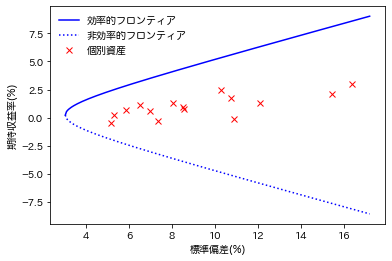

In [17]:
#%% 最小分散フロンティアの作図
sigma_gmv = 1.0 / np.sqrt(C)
sigma_p = np.linspace(sigma_gmv, 1.05 * np.max(Stdev), num=250)
mu_p_efficient = (A + np.sqrt(np.abs(C * sigma_p ** 2 - 1.0) * D)) / C
mu_p_inefficient = (A - np.sqrt(np.abs(C * sigma_p ** 2 - 1.0) * D)) / C
fig1 = plt.figure(num=1, facecolor='w')
plt.plot(sigma_p, mu_p_efficient, 'b-')
plt.plot(sigma_p, mu_p_inefficient, 'b:')
plt.plot(np.sqrt(np.diagonal(Sigma)), Mu, 'rx')
plt.legend(['効率的フロンティア', '非効率的フロンティア', '個別資産'],
           loc='best', frameon=False, prop=jpfont)
plt.xlabel('標準偏差(%)', fontproperties=jpfont)
plt.ylabel('期待収益率(%)', fontproperties=jpfont)
#plt.savefig('efficient_frontier.png', dpi=1000)
plt.show()

In [18]:
#%% 空売り制約の下での分散最小化問題の設定
Weight = cvx.Variable(Mu.shape[0])
Target_Return = cvx.Parameter(nonneg=False)
Risk_Variance = cvx.quad_form(Weight, Sigma)
Opt_Portfolio = cvx.Problem(cvx.Minimize(Risk_Variance),
                            [Weight.T @ Mu == Target_Return,
                             cvx.sum(Weight) == 1.0,
                             Weight >= 0.0])

In [19]:
#%% 空売り制約の下での最小分散フロンティアの計算
V_Target = np.linspace(Mu.min(), Mu.max(), num=250)
V_Risk = np.zeros(V_Target.shape)
V_Weight = np.zeros((V_Target.shape[0], Mu.shape[0]))
for idx, Target_Return.value in enumerate(V_Target):
    Opt_Portfolio.solve(solver=cvx.ECOS)
    V_Weight[idx, :] = Weight.value.T
    V_Risk[idx] = np.sqrt(Risk_Variance.value)

Text(0, 0.5, '期待収益率(%)')

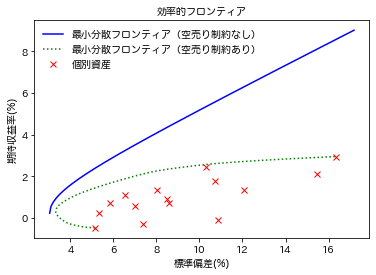

In [20]:
#%% 最小分散フロンティアの作図
sigma_gmv = 1.0 / np.sqrt(C)
sigma_p = np.linspace(sigma_gmv, 1.05 * np.max(Stdev), num=250)
mu_p_efficient = (A + np.sqrt(np.abs(C * sigma_p ** 2 - 1.0) * D)) / C
fig2 = plt.figure(num=2, facecolor='w')           
plt.plot(sigma_p, mu_p_efficient, 'b-')
plt.plot(V_Risk, V_Target, 'g:')
plt.plot(np.sqrt(np.diagonal(Sigma)), Mu, 'rx')
plt.legend(['最小分散フロンティア（空売り制約なし）',
            '最小分散フロンティア（空売り制約あり）',
            '個別資産'],
           loc='best', frameon=False, prop=jpfont)
plt.title('効率的フロンティア', fontproperties=jpfont)
plt.xlabel('標準偏差(%)', fontproperties=jpfont)
plt.ylabel('期待収益率(%)', fontproperties=jpfont)
#plt.savefig('efficient_frontier(空売り制約あり)_改.png', dpi=1500)

In [21]:
np. sqrt(Risk_Variance.value)


16.366703872754602

In [22]:
max(V_Risk)

16.366703872754602

In [23]:
V_Risk

array([ 5.14476846,  4.92085057,  4.7619222 ,  4.64617538,  4.55916578,
        4.4880731 ,  4.41949876,  4.35356163,  4.2903833 ,  4.23008738,
        4.17279883,  4.11864316,  4.06774549,  4.02022956,  3.97621661,
        3.93582417,  3.89916475,  3.86634455,  3.83746207,  3.81137856,
        3.78692045,  3.76379939,  3.74160136,  3.72007042,  3.69921067,
        3.67903351,  3.65955025,  3.64077201,  3.62270884,  3.60515936,
        3.58796858,  3.57114167,  3.55468381,  3.53860014,  3.52289579,
        3.50757586,  3.49264526,  3.47809694,  3.46392783,  3.45025667,
        3.43723472,  3.42486993,  3.41316942,  3.40214005,  3.39178837,
        3.38212059,  3.3731426 ,  3.36485992,  3.35727771,  3.3504007 ,
        3.34423325,  3.33877394,  3.33401719,  3.32996587,  3.32662255,
        3.32398938,  3.32206804,  3.32085977,  3.32036535,  3.32060302,
        3.32159062,  3.32332749,  3.32581245,  3.32904383,  3.33301902,
        3.33762999,  3.34280117,  3.34864739,  3.35520466,  3.36

In [24]:
Stdev

array([12.07626029, 10.72615829,  8.0312312 ,  8.56599059, 10.28198935,
       15.4448084 ,  5.84234027,  5.31737417,  5.14476846,  7.35994135,
       10.86506864,  8.49667428,  6.52998869, 16.3667039 ,  6.99196629])

In [25]:
Mu

array([ 1.33063375,  1.77533357,  1.34318653,  0.73664327,  2.45970328,
        2.13496282,  0.70274427,  0.23785123, -0.47416147, -0.29334974,
       -0.08101385,  0.91951308,  1.1144148 ,  2.95279972,  0.56353099])

<Figure size 432x288 with 0 Axes>

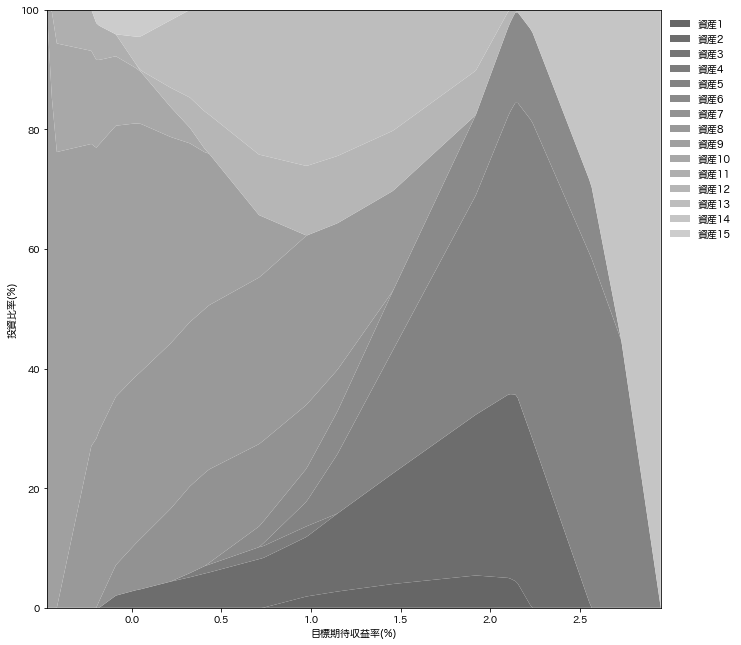

In [26]:
#   投資比率の推移の作図
fig3 = plt.figure(num=3, facecolor='w')
plt.figure(figsize=(11, 11))
plt.stackplot(V_Target, V_Weight.T*100,
              colors=tuple([tuple(gray*np.ones(3))
                            for gray in np.linspace(0.4, 0.8, num=Mu.shape[0])
                            ]))
plt.axis([Mu.min(), Mu.max(), 0.0, 100.0])
plt.legend(['資産1', '資産2', '資産3', '資産4', '資産5', '資産6', '資産7', '資産8', '資産9', '資産10', '資産11', '資産12', '資産13', '資産14', '資産15', '資産16', '資産17', '資産18', '資産19', '資産20', '資産21', '資産22', '資産23', '資産24', '資産25', '資産26', '資産27', '資産28', '資産29', '資産30', '資産31', '資産32', '資産33', '資産34', '資産35', '資産36', '資産37', '資産38', '資産39', '資産40', '資産41', '資産42', '資産43', '資産44', '資産45', '資産46', '資産47', '資産48', '資産49', '資産50', '資産51', '資産52', '資産53', '資産54', '資産55', '資産56', '資産57'],
           loc='upper left', bbox_to_anchor=(1.0, 1.0),
           frameon=False, prop=jpfont)
plt.xlabel('目標期待収益率(%)', fontproperties=jpfont)
plt.ylabel('投資比率(%)', fontproperties=jpfont)
#plt.savefig('投資割合.png', dpi=1000)
plt.show()

In [27]:
for i in range(len(V_Weight)):
    if V_Target[i] <= 0 or V_Risk[i] >= 18:
        
        print('(',i,') 目標収益率=%.3f リスク=%.3f 効用=%.3f'
          
              %(V_Target[i],V_Risk[i],0))#math.log(-V_Target[i])+math.log(18-V_Risk[i])*100))
        
    else:
        print('(',i,') 目標収益率=%.3f リスク=%.3f 効用=%.3f'
              
              %(V_Target[i],V_Risk[i],math.log(V_Target[i])+math.log(18-V_Risk[i])*100))
              
    print('ポートフォリオ=%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f'#,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f'#,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f'
          %(V_Weight[i][0],V_Weight[i][1],V_Weight[i][2],V_Weight[i][3],V_Weight[i][4],V_Weight[i][5],V_Weight[i][6],V_Weight[i][7],V_Weight[i][8],V_Weight[i][9],V_Weight[i][10],V_Weight[i][11],V_Weight[i][12],V_Weight[i][13],V_Weight[i][14]))#,V_Weight[i][15],V_Weight[i][16],V_Weight[i][17],V_Weight[i][18],V_Weight[i][19],V_Weight[i][20],V_Weight[i][21],V_Weight[i][22],V_Weight[i][23],V_Weight[i][24],V_Weight[i][25],V_Weight[i][26],V_Weight[i][27],V_Weight[i][28],V_Weight[i][29],V_Weight[i][30],V_Weight[i][31],V_Weight[i][32],V_Weight[i][33],V_Weight[i][34],V_Weight[i][35]))#,V_Weight[i][36],V_Weight[i][37],V_Weight[i][38],V_Weight[i][39],V_Weight[i][40],V_Weight[i][41],V_Weight[i][42],V_Weight[i][43],V_Weight[i][44],V_Weight[i][45],V_Weight[i][46],V_Weight[i][47],V_Weight[i][48],V_Weight[i][49],V_Weight[i][50],V_Weight[i][51],V_Weight[i][52],V_Weight[i][53],V_Weight[i][54],V_Weight[i][55]))
    print()

( 0 ) 目標収益率=-0.474 リスク=5.145 効用=0.000
ポートフォリオ=0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,1.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000

( 1 ) 目標収益率=-0.460 リスク=4.921 効用=0.000
ポートフォリオ=-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.924,0.076,0.000,-0.000,-0.000,-0.000,-0.000

( 2 ) 目標収益率=-0.447 リスク=4.762 効用=0.000
ポートフォリオ=-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.852,0.145,0.004,-0.000,-0.000,-0.000,-0.000

( 3 ) 目標収益率=-0.433 リスク=4.646 効用=0.000
ポートフォリオ=-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.807,0.163,0.030,-0.000,-0.000,-0.000,0.000

( 4 ) 目標収益率=-0.419 リスク=4.559 効用=0.000
ポートフォリオ=0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.762,0.182,0.056,0.000,0.000,0.000,0.000

( 5 ) 目標収益率=-0.405 リスク=4.488 効用=0.000
ポートフォリオ=-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.019,0.744,0.180,0.057,-0.000,-0.000,-0.000,0.000

( 6 ) 目標収益率=-0.392 リスク=4.419 効用=0.000
ポートフォリオ=-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.039,0.725,0.178,0.058,-0.000,-0.00

In [28]:
#(math.log(-1 * V_Target[0])+
(math.log(18-V_Risk[0]))#*100

2.553750852495443

In [29]:
#
# 最適ポートフォリオの決定
#

umax=0
for i in range(len(V_Weight)):
    if V_Target[i] <= 0:
        u=((math.log(-1 * V_Target[i]))+(-1 * math.log(18-V_Risk[i])))*100
        if u>umax:
            umax=u
            maxi=i
        print('(',i,') 目標収益率=%.3f リスク=%.3f 効用=%.3f'
              %(V_Target[i],V_Risk[i],u))
        print('ポートフォリオ=%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f'
              %(V_Weight[i][0],V_Weight[i][1],V_Weight[i][2],V_Weight[i][3],V_Weight[i][4],V_Weight[i][5],V_Weight[i][6],V_Weight[i][7],V_Weight[i][8],V_Weight[i][9],V_Weight[i][10],V_Weight[i][11],V_Weight[i][12],V_Weight[i][13],V_Weight[i][14]))
        
    else:
        u=(math.log(V_Target[i])+math.log(18-V_Risk[i]))*100
        if u>umax:
            umax=u
            maxi=i
        print('(',i,') 目標収益率=%.3f リスク=%.3f 効用=%.3f'
              %(V_Target[i],V_Risk[i],u))
        print('ポートフォリオ=%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f'
              %(V_Weight[i][0],V_Weight[i][1],V_Weight[i][2],V_Weight[i][3],V_Weight[i][4],V_Weight[i][5],V_Weight[i][6],V_Weight[i][7],V_Weight[i][8],V_Weight[i][9],V_Weight[i][10],V_Weight[i][11],V_Weight[i][12],V_Weight[i][13],V_Weight[i][14]))
print('\n効用の最大値（',maxi,'）',np.round(umax,3))

( 0 ) 目標収益率=-0.474 リスク=5.145 効用=-329.996
ポートフォリオ=0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,1.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000
( 1 ) 目標収益率=-0.460 リスク=4.921 効用=-334.668
ポートフォリオ=-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.924,0.076,0.000,-0.000,-0.000,-0.000,-0.000
( 2 ) 目標収益率=-0.447 リスク=4.762 効用=-338.911
ポートフォリオ=-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.852,0.145,0.004,-0.000,-0.000,-0.000,-0.000
( 3 ) 目標収益率=-0.433 リスク=4.646 効用=-342.911
ポートフォリオ=-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.807,0.163,0.030,-0.000,-0.000,-0.000,0.000
( 4 ) 目標収益率=-0.419 リスク=4.559 効用=-346.792
ポートフォリオ=0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.762,0.182,0.056,0.000,0.000,0.000,0.000
( 5 ) 目標収益率=-0.405 リスク=4.488 効用=-350.658
ポートフォリオ=-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.019,0.744,0.180,0.057,-0.000,-0.000,-0.000,0.000
( 6 ) 目標収益率=-0.392 リスク=4.419 効用=-354.619
ポートフォリオ=-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.039,0.725,0.178,0.0

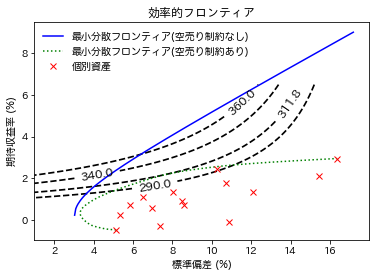

In [30]:
#
#
# 最小分散フロンティアと無差別曲線の作図
#
#

sigma_gmv = 1.0/np.sqrt(C)
sigma_p = np.linspace (sigma_gmv, 1.05*np.max(Stdev), num=250)
mu_p_efficient = (A + np.sqrt(np.abs (C*sigma_p**2 - 1.0)*D))/C

fig, ax = plt.subplots(1, facecolor='w')
ax.plot(sigma_p, mu_p_efficient, 'b-')
ax.plot(V_Risk, V_Target, 'g:')
ax.plot(np.sqrt (np.diagonal (Sigma)), Mu, 'rx')
ax.legend([u'最小分散フロンティア(空売り制約なし)',
    u'最小分散フロンティア(空売り制約あり)',
    u'個別資產'],
    loc='best', frameon=False, prop=jpfont)    
plt.title('効率的フロンティア')
ax.set_xlabel(u'標準偏差 (%)', fontproperties=jpfont)
ax.set_ylabel (u'期待収益率 (%)', fontproperties=jpfont)
"""
#%% 最小分散フロンティアの作図
sigma_gmv = 1.0 / np.sqrt(C)
sigma_p = np.linspace(sigma_gmv, 1.05 * np.max(Stdev), num=250)
mu_p_efficient = (A + np.sqrt(np.abs(C * sigma_p ** 2 - 1.0) * D)) / C
fig2 = plt.figure(num=2, facecolor='w')           
plt.plot(sigma_p, mu_p_efficient, 'b-')
plt.plot(V_Risk, V_Target, 'g:')
plt.plot(np.sqrt(np.diagonal(Sigma)), Mu, 'rx')
plt.legend(['最小分散フロンティア（空売り制約なし）',
            '最小分散フロンティア（空売り制約あり）',
            '個別資産'],
           loc='best', frameon=False, prop=jpfont)
plt.title('効率的フロンティア')
plt.xlabel('標準偏差(%)', fontproperties=jpfont)
plt.ylabel('期待収益率(%)', fontproperties=jpfont)
"""
#
#　無差別曲線の描画
#

# 無差別曲線の作成
wn=100
ret_range = [0.1, 6.5] # リターンのレンジ
risk_range = [1, 16.5] # リスクのレンジ
ret_lin = np.linspace(ret_range[0], ret_range[1], wn) # リターンの刻み
risk_lin = np.linspace(risk_range[0], risk_range[1], wn) # リスクの刻み
ret, risk = np.meshgrid(ret_lin,risk_lin)

U = np.zeros((len(ret_lin), len(risk_lin)))

for ret_i in range(wn):
    for risk_i in range(wn):
        U[risk_i,ret_i] = (math.log(ret_lin[ret_i])+math.log(18-risk_lin[risk_i]))*100
        #print(J[i1, i0])

# 無差別曲線のプロット
cont = plt.contour(risk,ret, U, 30, colors='black',
                   levels=(290, umax, 340, 360),linewidths=1.7,
                   linestyles="dashed")
cont.clabel(fmt='%1.1f', fontsize=12)
#plt.savefig('Frontier_無差別曲線あり(ver1.0).png', dpi=1500)
plt.show()


In [31]:
U

array([[  53.06282511,  102.92586017,  136.04584184, ...,  468.49238076,
         469.5020123 ,  470.5015521 ],
       [  52.13758347,  102.00061853,  135.1206002 , ...,  467.56713912,
         468.57677066,  469.57631046],
       [  51.2037011 ,  101.06673616,  134.18671783, ...,  466.63325675,
         467.64288829,  468.64242808],
       ...,
       [-170.75297352, -120.88993845,  -87.76995679, ...,  244.67658213,
         245.68621368,  246.68575347],
       [-179.78385153, -129.92081646,  -96.8008348 , ...,  235.64570412,
         236.65533567,  237.65487546],
       [-189.71199849, -139.84896342, -106.72898175, ...,  225.71755716,
         226.72718871,  227.7267285 ]])

# 配分が0となっている銘柄の投資額の調整

In [32]:
Asset_Weight_tmp = []

for i in range(15):
    Asset_Weight_tmp.append(round(V_Weight[195][i], 3)) #26

In [33]:
sum(Asset_Weight_tmp)

0.9990000000000001

In [34]:
Asset_Weight_tmp

[0.012,
 0.292,
 0.0,
 0.0,
 0.518,
 0.151,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.026,
 0.0]

In [35]:
"""
for i in range(15):
    if Asset_Weight_tmp[i] == 0.001:
        Asset_Weight_tmp[i] = 0.0
"""

Asset_Weight_tmp[0] = round((Asset_Weight_tmp[0] + (0.001 )), 3)
Asset_Weight_tmp[13] = Asset_Weight_tmp[13] + Asset_Weight_tmp[0]
Asset_Weight_tmp[0] = 0.0
Asset_Weight_tmp


[0.0,
 0.292,
 0.0,
 0.0,
 0.518,
 0.151,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.039,
 0.0]

In [36]:
sum(Asset_Weight_tmp)

1.0

In [37]:
Asset_Weight_tmp.count(0)

11

In [38]:
Assets_Cov = R.cov()
Asset_Weight_tmp =np.array(Asset_Weight_tmp)
print('リスクは' + str(np.sqrt(np.dot(Asset_Weight_tmp.T, np.dot(Assets_Cov, Asset_Weight_tmp)))))

リスクは7.871196941154905


In [39]:
Data1 = pd.read_csv('efficient_frontier(ver1.7).csv', encoding='Shift_JIS')
del Data1['銘柄名称']
del Data1['キヤノン']
Data1.drop(index=[61, 62, 63], inplace=True)

Data2 = (Data1.diff()/Data1.shift(1))[1:] * 100 
column = Data2.columns.tolist()
column.pop(1)
column.pop(0)

Assets_Cov = R.cov()

df = pd.DataFrame(data=Data2['日経平均'])
df['TOPIX'] = Data2['TOPIX']

iterate_n = 4

Asset_Weights = []
Portfolio_Return = []
Portfolio_Risk = []
Utility = []

for i_1 in range(iterate_n):
    for i_2 in range(iterate_n):
        for i_3 in range(iterate_n):
            for i_4 in range(iterate_n):
                for i_5 in range(iterate_n):
                    for i_6 in range(iterate_n):
                        for i_7 in range(iterate_n):
                            for i_8 in range(iterate_n):
                                for i_9 in range(iterate_n):
                                    for i_10 in range(iterate_n):
                                        for i_11 in range(iterate_n):
                                        
                                            Asset_Weight = [] #初期化
                                        
                                            Sum_of_zero_Assets_tmp = []
                                        
                                            Sum_of_zero_Assets_tmp.append(((i_1 + 2)*4)/500)
                                            Sum_of_zero_Assets_tmp.append(((i_2 + 2)*4)/500)
                                            Sum_of_zero_Assets_tmp.append(((i_3 + 2)*4)/500)
                                            Sum_of_zero_Assets_tmp.append(((i_4 + 2)*4)/500)
                                            Sum_of_zero_Assets_tmp.append(((i_5 + 2)*4)/500)
                                            Sum_of_zero_Assets_tmp.append(((i_6 + 2)*4)/500)
                                            Sum_of_zero_Assets_tmp.append(((i_7 + 2)*4)/500)
                                            Sum_of_zero_Assets_tmp.append(((i_8 + 2)*4)/500)
                                            Sum_of_zero_Assets_tmp.append(((i_9 + 2)*4)/500)
                                            Sum_of_zero_Assets_tmp.append(((i_10 + 2)*4)/500)
                                            Sum_of_zero_Assets_tmp.append(((i_11 + 2)*4)/500)
                                        
                                            Sum_of_zero_Assets = sum(Sum_of_zero_Assets_tmp)
                                        
                                            Data1 = pd.read_csv('efficient_frontier(ver1.7).csv', encoding='Shift_JIS')
                                            del Data1['銘柄名称']
                                            del Data1['キヤノン']
                                        
                                            Data1.drop(index=[61, 62, 63], inplace=True)
    
                                            #収益率などの計算
                                            Data2 = (Data1.diff()/Data1.shift(1))[1:] * 100 
                                            column = Data2.columns.tolist()
                                            column.pop(1)
                                            column.pop(0)
                                        
                                            """
                                            for j in range(15):
                                                if Asset_Weight_tmp[j] == 0:
                                                    Asset_Weight.append(min_lev)
            
                                                else:
                                                    Asset_Weight.append(round((Asset_Weight_tmp[j] * (1 - Sum_of_zero_Assets * Asset_Weight_tmp.count(0))), 3))
                                            """
                                
                            
                                            Asset_Weight.append(((i_1+2)*4)/500)
                                            Asset_Weight.append(round((Asset_Weight_tmp[1] * (1 - Sum_of_zero_Assets)), 3))
                                            Asset_Weight.append(((i_2+2)*4)/500)
                                            Asset_Weight.append(((i_3+2)*4)/500)
                                            Asset_Weight.append(round((Asset_Weight_tmp[4] * (1 - Sum_of_zero_Assets)), 3))
                                            Asset_Weight.append(round((Asset_Weight_tmp[5] * (1 - Sum_of_zero_Assets)), 3))
                                            Asset_Weight.append(((i_4+2)*4)/500)
                                            Asset_Weight.append(((i_5+2)*4)/500)
                                            Asset_Weight.append(((i_6+2)*4)/500)
                                            Asset_Weight.append(((i_7 +2)*4)/500)
                                            Asset_Weight.append(((i_8 + 2)*4)/500)
                                            Asset_Weight.append(((i_9 + 2)*4)/500)
                                            Asset_Weight.append(((i_10 + 2)*4)/500)
                                            Asset_Weight.append(round((Asset_Weight_tmp[13] * (1 - Sum_of_zero_Assets)), 3))
                                            Asset_Weight.append(((i_11 + 2)*4)/500)
                                        
                                            Asset_Weight = np.array(Asset_Weight)
                                    
                                            Asset_Weights.append(Asset_Weight)
                                            #print(sum(Asset_Weight))
                                            #print('リターンは' + str(sum(Mu * Asset_Weight)))
                                            Portfolio_Return.append(sum(Mu * Asset_Weight))
                                            #print('リスクは' + str(np.sqrt(np.dot(Asset_Weight.T, np.dot(Assets_Cov, Asset_Weight)))))
                                            Portfolio_Risk.append(np.sqrt(np.dot(Asset_Weight.T, np.dot(Assets_Cov, Asset_Weight))))
                                            Utility.append(((math.log(sum(Mu * Asset_Weight))+(math.log(18 - (np.sqrt(np.dot(Asset_Weight.T, np.dot(Assets_Cov, Asset_Weight))))))))*100)
    
                                            """
                                            for k in range(15):
                                                Data2[column[k]] = (Data2[column[k]] * Asset_Weight[k])
        
                                            for l in range(15):
                                                if l == 0:
                                                    Data2['Portfolio'] = Data2[column[l]]
        
                                                else:
                                                    Data2['Portfolio'] = Data2['Portfolio'] + Data2[column[l]]
        
                                            df[str(Asset_Weight)] = Data2['Portfolio']
                                            """
"""
l_d = len(df)

Perform1 = [[] for i in range(100)]

for i in range(100):
    for j in range(l_d):
        if df.iloc[j, 0] <  df.iloc[j, i + 2]:
            Perform1[i].append('Win')
        else:
            Perform1[i].append('Lose')
        
Perform2 = [[] for i in range(100)]

for i in range(100):
    for j in range(l_d):
        if df.iloc[j, 1] < df.iloc[j, i + 2]:
            Perform2[i].append('Win')
        else:
            Perform2[i].append('Lose')
            
Win_nikkei = []

for i in range(100):
    Win_nikkei.append(Perform1[i].count('Win'))
    
Win_TOPIX = []

for i in range(100):
    Win_TOPIX.append(Perform2[i].count('Win'))
            
DF = df.copy()

for i in range (102):
    for j in range(len(DF)):
        if j == 0:
            DF.iloc[j, i] = DF.iloc[j, i]
            
        else:
            DF.iloc[j, i] = DF.iloc[j, i] + DF.iloc[j - 1, i]
            
Perform3 = [[] for i in range(100)]

for i in range(100):
    for j in range(l_d):
        if DF.iloc[j, 0] <  DF.iloc[j, i + 2]:
            Perform3[i].append('Win')
        else:
            Perform3[i].append('Lose')
        
Perform4 = [[] for i in range(100)]

for i in range(100):
    for j in range(l_d):
        if DF.iloc[j, 1] < DF.iloc[j, i + 2]:
            Perform4[i].append('Win')
        else:
            Perform4[i].append('Lose')
            
Win_nikkei_tmp = []

for i in range(100):
    Win_nikkei_tmp.append(Perform3[i].count('Win'))
    
Win_TOPIX_tmp = []

for i in range(100):
    Win_TOPIX_tmp.append(Perform4[i].count('Win'))
"""

"\nl_d = len(df)\n\nPerform1 = [[] for i in range(100)]\n\nfor i in range(100):\n    for j in range(l_d):\n        if df.iloc[j, 0] <  df.iloc[j, i + 2]:\n            Perform1[i].append('Win')\n        else:\n            Perform1[i].append('Lose')\n        \nPerform2 = [[] for i in range(100)]\n\nfor i in range(100):\n    for j in range(l_d):\n        if df.iloc[j, 1] < df.iloc[j, i + 2]:\n            Perform2[i].append('Win')\n        else:\n            Perform2[i].append('Lose')\n            \nWin_nikkei = []\n\nfor i in range(100):\n    Win_nikkei.append(Perform1[i].count('Win'))\n    \nWin_TOPIX = []\n\nfor i in range(100):\n    Win_TOPIX.append(Perform2[i].count('Win'))\n            \nDF = df.copy()\n\nfor i in range (102):\n    for j in range(len(DF)):\n        if j == 0:\n            DF.iloc[j, i] = DF.iloc[j, i]\n            \n        else:\n            DF.iloc[j, i] = DF.iloc[j, i] + DF.iloc[j - 1, i]\n            \nPerform3 = [[] for i in range(100)]\n\nfor i in range(100):\n

In [40]:
sum(Asset_Weights[0])

1.0000000000000002

In [47]:
len(Utility)

177147

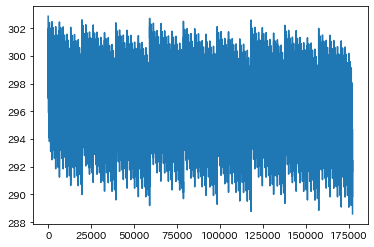

In [49]:
plt.plot(Utility)
#plt.savefig('/Users/shintaro/Downloads/Utility.png', dpi=500)

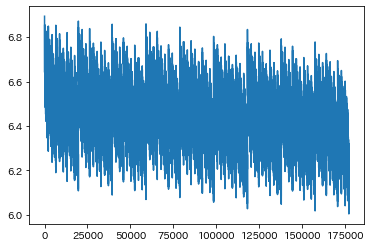

In [56]:
plt.plot(Portfolio_Risk)

In [43]:
str(Asset_Weight)

'[0.04  0.164 0.04  0.04  0.29  0.085 0.04  0.04  0.04  0.04  0.04  0.04\n 0.04  0.022 0.04 ]'

In [44]:
Stdev

array([12.07626029, 10.72615829,  8.0312312 ,  8.56599059, 10.28198935,
       15.4448084 ,  5.84234027,  5.31737417,  5.14476846,  7.35994135,
       10.86506864,  8.49667428,  6.52998869, 16.3667039 ,  6.99196629])

In [52]:
5**11

48828125

In [54]:
4**11

4194304

In [45]:
df

日経平均      TOPIX
1    1.920000   0.514084
2   -2.591044  -0.508447
3    5.928204   5.310029
4    5.070066   5.485205
5    4.401731   3.346876
6   -0.382069   0.201500
7    0.407797   0.897041
8   -1.096972  -1.479822
9    1.520313   1.269338
10   2.364099   2.387387
11   1.948340   2.775493
12  -0.540347   0.416279
13  -1.399937  -0.074138
14   3.614127   3.545174
15   8.131790   5.446186
16   3.240790   1.479082
17   0.175930   1.421812
18   1.464313   1.053610
19  -4.459421  -3.727861
20  -2.782007  -2.937384
21   4.724321   3.550079
22  -1.184135  -1.675641
23   0.462530  -0.947667
24   1.117308   1.294132
25   1.380837  -1.023219
26   5.488221   4.719509
27  -9.119305  -9.416976
28   1.964375   1.295774
29 -10.452703 -10.396714
30   3.790800   4.912689
31   2.944474   2.562696
32  -0.838666  -0.996479
33   4.965243   1.651755
34  -7.446696  -6.529949
35   3.275199   2.569630
36   1.154404   0.902562
37  -3.796942  -3.404168
38   5.078493   5.022952
39   5.383382   4.988664
40   1.600163   1.940600
41   1.557102   1.294605
42  -1.908303  -2.144816
43  -8.886895 -10.304315
44 -10.528091  -7.136948
45   6.748847   4.346989
46   8.340229   6.805871
47   1.875181  -0.313365
48  -2.593936  -4.023044
49   6.585721   8.162774
50   0.196026   0.451742
51  -0.897084  -2.839759
52  15.043176  11.118006
53   3.822972   2.835457
54   0.798785   0.227187
55   4.708823   3.079977
56   0.734620   4.800777
57  -1.254918  -2.853634
58   0.164685   1.303313
59  -0.237525   1.070734
60  -5.237443  -2.186183

In [46]:
DF

NameError: name 'DF' is not defined

In [ ]:
Win_nikkei_tmp[30]

In [ ]:
Win_TOPIX_tmp[30]

In [ ]:
l1 = []

for i in range(50):
    if Win_nikkei[i] == 74 :#or Win_nikkei[i] == 72 :#or Win_nikkei[i] == 71 :
        l1.append(i)
        
l1

In [ ]:
l2 = []
for i in range(50):
    if Win_TOPIX[i] == 76 :#or Win_TOPIX[i] == 75 or Win_TOPIX[i] == 74:
        l2.append(i)
        
l2

In [ ]:
l3 = []

for i in range(len(l2)):
    if l2[i] in l1:
        l3.append(l2[i])
        
l3

In [ ]:
df.plot(figsize=(20,20), alpha = 0.7, colormap = 'autumn')
#plt.savefig('パフォーマンス比較.png', dpi = 500)

In [ ]:
DataFrame = DF.copy()
del DataFrame['日経平均']
del DataFrame['TOPIX']

In [ ]:
data_list1 = DF['日経平均']
data_list2 = DF['TOPIX']

In [ ]:
Data_set = pd.read_csv('efficient_frontier(ver1.7).csv', encoding = 'Shift_Jis')#, encoding = 'Shift_jis')
date = Data_set['銘柄名称'].tolist()
date.pop(0)

In [ ]:
DataFrame.set_axis(date, axis=0, inplace=True)

In [ ]:
DataFrame.plot(alpha = 0.7, colormap = 'autumn', legend = False)
plt.plot(data_list1, color = 'blue')#, linestyle = '--')
plt.plot(data_list2, color = 'green')#, linestyle = ':')
plt.title('パフォーマンス比較')
plt.xlabel('Date')
plt.ylabel('累積収益率')
#plt.savefig('パフォーマンス比較_改(ver1.0).png', dpi = 1500)

In [ ]:
Asset_Weight_tmp

In [ ]:
sum(Asset_Weight_tmp)

In [ ]:
Asset_Weight = []

for i in  range(15):
    if Asset_Weight_tmp[i] == 0:
        Asset_Weight.append(round(10 / 500, 3))
        
    else:
        Asset_Weight.append(round((Asset_Weight_tmp[i] * (1 - (10 / 500 * Asset_Weight_tmp.count(0)))), 3))

In [ ]:
"""
Asset_Weight = []

for i in  range(15):
    if Asset_Weight_tmp[i] == 0:
        Asset_Weight.append(0)
        
    else:
        Asset_Weight.append(round(Asset_Weight_tmp[i], 3))
"""

In [ ]:
Asset_Weight

In [ ]:
sum(Asset_Weight)

In [ ]:
Data1 = pd.read_csv('efficient_frontier(ver1.7).csv', encoding='Shift_JIS')
del Data1['銘柄名称']
del Data1['キヤノン']

In [ ]:
#Data1 = pd.read_csv('test_data(ver1.0).csv', encoding='Shift_JIS')
#del Data1['銘柄名称']
#del Data1['西日本フィナンシャルホールディングス']
#del Data1['関西電力']
#del Data1['静岡銀行']
#del Data1['キヤノン']

In [ ]:
#Data1 = Data1.reindex(columns = comp_list)

In [ ]:
Data2 = (Data1.diff()/Data1.shift(1))[1:] * 100 

In [ ]:
for i in range(len(Data2)):
    if math.isnan(Data2.iloc[i, 15]): #18
               Data2.iloc[i, 18] = 0

In [ ]:
column = Data2.columns.tolist()
column.pop(1)
column.pop(0)

In [ ]:
Data3 = (Data1.diff()/Data1.shift(1))[1:] * 100 
practice_1_tmp = Data3['エーザイ']
print(sum(practice_1_tmp) * Asset_Weight[0])
practice_1 = practice_1_tmp * Asset_Weight[0]
print(sum(practice_1))

In [ ]:
practice_1

In [ ]:
practice_2 = Data2['エーザイ']
print(sum(practice_2))
practice_1 == practice_2

In [ ]:
Data3

In [ ]:
Data3.mean()

In [ ]:
Data4 = Data3.sum()
#Data4.to_csv('portfolio_return(ver1.1).csv', encoding = 'shift_JIS')

In [ ]:
Data4[2] * Asset_Weight[0]

In [ ]:
#Data3.to_csv('protfolio_return(ver1.0).csv', encoding = 'Shift_JIS')

In [ ]:
for i in range(15):
    Data2[column[i]] = (Data2[column[i]] * Asset_Weight[i])

In [ ]:
for i in range(15):
    if i == 0:
        Data2['Portfolio'] = Data2[column[i]]
    
    else:
        Data2['Portfolio'] = Data2['Portfolio'] + Data2[column[i]]

In [ ]:
Data2

In [ ]:
df = pd.DataFrame(data=Data2['日経平均'])
df['TOPIX'] = Data2['TOPIX']
df['Portfolio'] = Data2['Portfolio']

In [ ]:
df

In [ ]:
df.plot(figsize=(20,20), alpha = 0.5)
#plt.savefig('パフォーマンス比較_毎次.png', dpi = 500)

In [ ]:
l_d = len(df)
Perform1 = []
for i in range(l_d):
    if df.iloc[i, 0] <  df.iloc[i, 2]:
        Perform1.append('Win')
    else:
        Perform1.append('Lose')
        
Perform2 = []
for i in range(l_d):
    if df.iloc[i, 1] < df.iloc[i, 2]:
        Perform2.append('Win')
    else:
        Perform2.append('Lose')

In [ ]:
Perform1.count('Win')

In [ ]:
Perform2.count('Win')

In [ ]:
Data1

In [ ]:
Data2

In [ ]:
for i in range (3):
    for j in range(len(df)):
        if j == 0:
            df.iloc[j, i] = df.iloc[j, i]
            
        else:
            df.iloc[j, i] = df.iloc[j, i] + df.iloc[j - 1, i]

In [ ]:
df#.to_csv('portfolio_return(ver1.2).csv', encoding = 'Shift_JIS')

In [ ]:
df.plot(figsize=(20,20), alpha = 0.5)
#plt.savefig('パフォーマンス比較_累積.png', dpi = 500)

In [ ]:
Asset_Weight

In [ ]:
Portfolio = []

for i in range(15):
    Portfolio.append(round((Asset_Weight[i] * 500), 3))

In [ ]:
Portfolio

In [ ]:
sum(Portfolio)

In [ ]:
max(Data2['アウトソーシング'])

In [ ]:
df_last = df.copy()

In [ ]:
del df_last['日経平均']

In [ ]:
Data_set = pd.read_csv('efficient_frontier(ver1.7).csv', encoding = 'Shift_Jis')#, encoding = 'Shift_jis')

In [ ]:
date = Data_set['銘柄名称'].tolist()
date.pop(0)

In [ ]:
len(date) == len(df_last)

In [ ]:
df_last.set_axis(date, axis=0, inplace=True)

In [ ]:
df_last

In [ ]:
l_d = len(df)
Perform1 = []
for i in range(l_d):
    if df.iloc[i, 0] <  df.iloc[i, 2]:
        Perform1.append('Win')
    else:
        Perform1.append('Lose')
        
Perform2 = []
for i in range(l_d):
    if df.iloc[i, 1] < df.iloc[i, 2]:
        Perform2.append('Win')
    else:
        Perform2.append('Lose')

In [ ]:
Perform1.count('Win')

In [ ]:
Perform2.count('Win')

In [ ]:
df_last.plot(figsize=(20,20),
             title='パフォーマンス比較_累積', 
             grid=False,
             legend=True,
             xlabel='Date',
             ylabel='累積収益率',
             fontsize=10,
             alpha = 0.5)
#plt.savefig('パフォーマンス比較_累積_最終.png', dpi = 700)